In [344]:
import csv
import numpy as np 
import pandas as pd
from geojson import dumps
import geojson as g

In [18]:
def parse(raw_file,delimiter):
    
    #파일을 열어줌
    opened_file =open(raw_file)
    #csv로 읽어줌
    csv_data = csv.reader(opened_file,delimiter = delimiter)
    parsed_data=[]
    #첫번째 row 값 생략
    fields= next(csv_data)
    #각각의 fields 와 row 를 keys,values값으로
    for row in csv_data:
        parsed_data.append(dict(zip(fields,row)))
    opened_file.close()
    
    return parsed_data

def main():
    new_data= parse(MY_FILE,'.')
    
    print (new_data)

if __name__ == '__main__':
    main()


[{'IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Location,X,Y': '030203898,FRAUD,"FORGERY, CREDIT CARD",Tuesday,02/18/2003,16:30,NORTHERN,NONE,2800 Block of VAN NESS AV,-122'}, {'IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Location,X,Y': '000038261,WARRANTS,WARRANT ARREST,Thursday,04/17/2003,22:45,NORTHERN,"ARREST, BOOKED",POLK ST / SUTTER ST,-122'}, {'IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Location,X,Y': '030203901,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Tuesday,02/18/2003,16:05,NORTHERN,NONE,VAN NESS AV / MCALLISTER ST,-122'}, {'IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Location,X,Y': '030203923,DRUG/NARCOTIC,SALE OF BASE/ROCK COCAINE,Tuesday,02/18/2003,17:00,BAYVIEW,"ARREST, BOOKED",1600 Block of KIRKWOOD AV,-122'}, {'IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Location,X,Y': '030203923,OTHER OFFENSES,CONSPIRACY,Tuesday,02/18/2003,17:00,BAYVIEW,"AR

In [122]:
#Counter 함수 없이 하다 Counter로 더 보기 편하게 변경

from matplotlib import pyplot as plt

def visualize_days(a):
    a=pd.read_csv(r'C:\Users\sky\Downloads\new-coder-master\dataviz\data\sample_sfpd_incident_all.csv')

    b={'Mon':0,'Tues':0,'Wed':0,'Thurs':0,'Fri':0,'Sat':0,'Sun':0}
    for i in range(len(a.DayOfWeek)):
        if a.DayOfWeek[i:i+1].values == 'Monday':
            b['Mon']+=1
        if a.DayOfWeek[i:i+1].values == 'Tuesday':
            b['Tues']+=1
        if a.DayOfWeek[i:i+1].values == 'Wednesday':
            b['Wed']+=1
        if a.DayOfWeek[i:i+1].values == 'Thursday':
            b['Thurs']+=1
        if a.DayOfWeek[i:i+1].values == 'Friday':
            b['Fri']+=1
        if a.DayOfWeek[i:i+1].values == 'Saturday':
            b['Sat']+=1
        if a.DayOfWeek[i:i+1].values == 'Sunday':
            b['Sun']+=1
    plt.plot(list(b.keys()),list(b.values()));plt.grid(True)
    return

In [250]:
def visualize_day():
    a=pd.read_csv(r'C:\Users\sky\Downloads\new-coder-master\dataviz\data\sample_sfpd_incident_all.csv')

    b=Counter(a['DayOfWeek'])
    c=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
    data=[b["Monday"],
          b["Tuesday"],
          b["Wednesday"],
          b["Thursday"],
          b["Friday"],
          b["Saturday"],
          b["Sunday"]]
    plt.plot(data)
    plt.xticks(range(len(c)),c)
    plt.grid(True)
    plt.savefig('Day.png') #C:\Users\sky
    plt.show() 

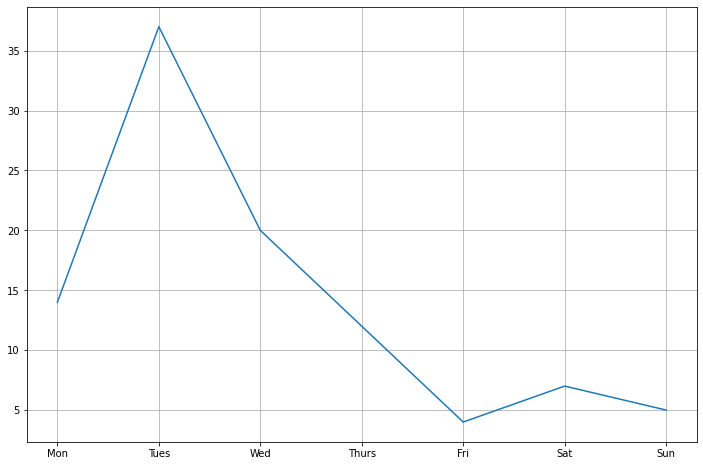

In [244]:
def visualize_type():
    a=pd.read_csv(r'C:\Users\sky\Downloads\new-coder-master\dataviz\data\sample_sfpd_incident_all.csv')
    counter=Counter(a['Category'])
    labels =tuple(counter.keys())
    xlocation = np.array(range(len(labels)))+0.5
    width=0.5
    plt.bar(xlocation,counter.values(),width=width)
    plt.xticks(xlocation+width/2,labels,rotation=90)
    plt.subplots_adjust(bottom=0.4)
    plt.rcParams['figure.figsize'] = 12,8
    plt.savefig('Type.png')
    plt.show()


In [361]:
#def create_map()

#import fiona
geo_map = {"type": "FeatureCollection"}
a=pd.read_csv(r'C:\Users\sky\Downloads\new-coder-master\dataviz\data\sample_sfpd_incident_all.csv')
item_list=[]
for i in range(len(a)):
    line=a.loc[i]
    data={}
    data['type']='Feature'
    data['id'] = i
    data['propoerties'] ={'title':line[1],
                         'description':line[2],
                         'date':line[4]}
    data['geometry'] = {'type':'Point',
                       'coordinates':(line[9],line[10])}
    item_list.append(data)
for point in item_list:
    geo_map.setdefault('features',[]).append(point)
    
with open('file_sf.geojson','w') as f:
    f.write(json(geo_map)

TypeError: 'module' object is not callable

In [363]:
geo_map

KeyError: 0